<a href="https://colab.research.google.com/github/krislars/modphys/blob/master/schrodinger_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install findiff

  Created wheel for findiff: filename=findiff-0.8.9-py3-none-any.whl size=29227 sha256=5a180e0331e7ab37c55f6d6f0ab2b03c6a5cd89e062eff5a96a7e4b559475c48
  Stored in directory: /root/.cache/pip/wheels/72/64/7b/009d4ccf603b1e1c1929d35c6c31071e7dca901546c2973e51
Successfully built findiff


In [ ]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from findiff import FinDiff
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [ ]:
x = np.linspace(-8, 8, 201) # define our grid

In [ ]:
poten=np.zeros(201)
poten[np.abs(x)>2]=10

energies, states = eigs(
            -0.5 * FinDiff(0, x[1]-x[0], 2).matrix(x.shape) + diags(poten),
            k=10, which='SR')

In [ ]:
energies.real

array([ 0.23978208,  0.95619527,  2.13974185,  3.7715871 ,  5.81512435,
        8.18125879, 10.00000146, 10.        , 10.        ,  9.99999854])

In [ ]:
energies.real/energies[0].real

array([ 1.        ,  3.98776779,  8.92369361, 15.72922811, 24.25170491,
       34.11955826, 41.70453976, 41.70453368, 41.70453368, 41.70452759])

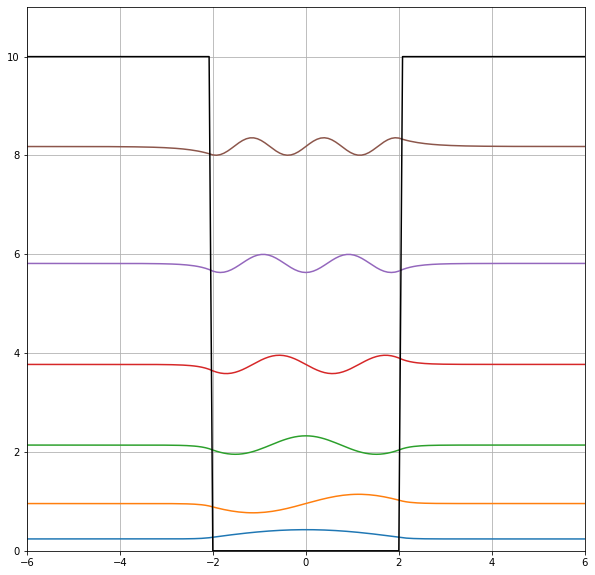

In [ ]:
for j in [0,1,2,3,4,5]:
    plt.plot(x, states[:, j].real + energies[j].real)
plt.plot(x, poten, 'k')
plt.grid()
plt.xlim(-6, 6)
plt.ylim(0, 11)
plt.show()

In [ ]:
poten = 0.5*x**2

energies, states = eigs(
            -0.5 * FinDiff(0, x[1]-x[0], 2).matrix(x.shape) +
                        diags(poten),
                        k=10, which='SR')

In [ ]:
energies.real

array([0.49979992, 1.49899928, 2.49739719, 3.49499269, 4.49178481,
       5.48777256, 6.48295498, 7.47733107, 8.47089986, 9.46366034])

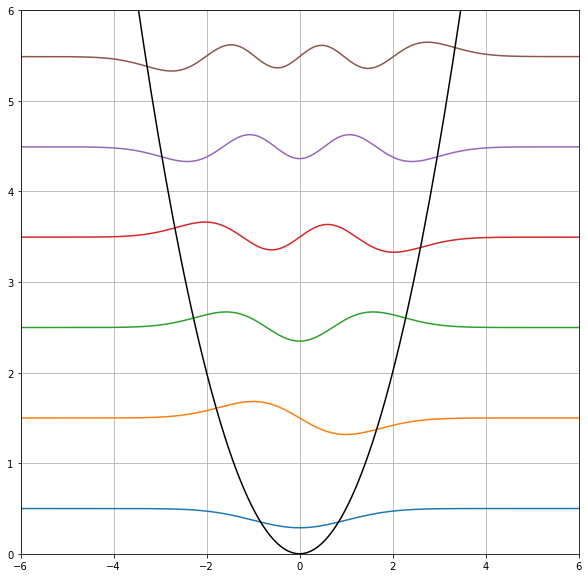

In [ ]:
for j in [0,1,2,3,4,5]:
    plt.plot(x, states[:, j].real + energies[j].real)
plt.plot(x, poten, 'k')
plt.grid()
plt.xlim(-6, 6)
plt.ylim(0, 6)
plt.show()

Reference:
https://medium.com/@mathcube7/two-lines-of-python-to-solve-the-schr%C3%B6dinger-equation-2bced55c2a0e